In [47]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
from nltk.sentiment.util import *

#sci-kit learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn.metrics import (accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc, 
                             mean_squared_error, log_loss, precision_recall_curve, classification_report, 
                             precision_recall_fscore_support)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import scikitplot as skplt

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import word2vec

from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [44]:
from nltk.corpus import PlaintextCorpusReader
#
# Root folder where the text files are located
#
corpus_root = 'C:\\Users\\raksh\\Downloads\\op_spam_v1.4\\op_spam_v1.4\\positive_polarity'
corpus_root1 = 'C:\\Users\\raksh\\Downloads\\op_spam_v1.4\\op_spam_v1.4\\negative_polarity'
#
# Read the list of files
#
filelists = PlaintextCorpusReader(corpus_root, '.*')
filelists1 = PlaintextCorpusReader(corpus_root1, '.*')
#
# List down the IDs of the files read from the local storage
#
filelists.fileids()
filelists1.fileids()

list_pos=[]
list_neg=[]

for i in filelists.fileids():
    with open("C:\\Users\\raksh\\Downloads\\op_spam_v1.4\\op_spam_v1.4\\positive_polarity\\"+i,'r') as file:
        countriesStr = file.read().replace('\n','')
        list_pos.append(countriesStr)

for i in filelists1.fileids():
    with open("C:\\Users\\raksh\\Downloads\\op_spam_v1.4\\op_spam_v1.4\\negative_polarity\\"+i,'r') as file:
        countriesStr = file.read().replace('\n','')
        list_neg.append(countriesStr)


In [49]:
positive_features = pd.DataFrame(
    {'review':f,'label': 'pos'} for f in list_pos
)

In [50]:
positive_features

,review,label
0,"After recent week stay at the Affinia Hotels, ...",pos
1,"Although much too overpriced in my opinion, th...",pos
2,The Affinia hotel in Chicago was superb. the r...,pos
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,pos
4,The Affinia Chicago is a wonderful place to st...,pos
...,...,...
795,I stayed at The Talbott for 3 nights on busine...,pos
796,We loved the Talbott. The location was fabulou...,pos
797,My husband attended a conference in Chicago fo...,pos
798,This is a great find for downtown Chicago. The...,pos


In [51]:
negative_features = pd.DataFrame(
    {'review':f,'label': 'neg'} for f in list_neg
)

In [52]:
negative_features

,review,label
0,Affinia Chicago is one of the worst hotels I h...,neg
1,I recently stayed at the Affina Chicago hotel ...,neg
2,I stayed at the Affina Chicago for my annivers...,neg
3,If you are looking for a high end hotel on the...,neg
4,I just returned from a long weekend in Chicago...,neg
...,...,...
795,I have stayed in the Talbott a few times and h...,neg
796,We reserved a room with a sleeper couch a few ...,neg
797,I can easily say this is one of the worst hote...,neg
798,Just back from spending Memorial Day weekend i...,neg


In [55]:
positive_features.review = positive_features.review.apply(lambda x:x.lower())

In [56]:
negative_features.review = negative_features.review.apply(lambda x:x.lower())

In [57]:
positive_features.review[2]

"the affinia hotel in chicago was superb. the room service was exemplary and the food, i don't even know were to start. the chef obviously knew what he was doing, i especially loved the seafood, my personal favorite was the shrimp. aside from this, i loved how beautiful the hotel was. it is definetly a bargain for the price, for that price you would probably get a good 3 star hotel but, i felt as if i was in a $10,000 a night 5 star hotel in the europe. great bang for your buck. would recommend it to anybody looking to relax at a great hotel with great amenities in a great city. my friends actually went their a while back because of me. they loved it! i know you will too."

In [58]:

positive_features.review[2].split()[0:5]

['the', 'affinia', 'hotel', 'in', 'chicago']

In [59]:
punctuations = list(string.punctuation)
punctuations[1:10]

['"', '#', '$', '%', '&', "'", '(', ')', '*']

In [60]:
positive_features.review = positive_features.review.apply(lambda x: " ".join(x for x in x.split() if x not in punctuations))
negative_features.review = negative_features.review.apply(lambda x: " ".join(x for x in x.split() if x not in punctuations))

In [61]:
positive_features.review[2]

"the affinia hotel in chicago was superb. the room service was exemplary and the food, i don't even know were to start. the chef obviously knew what he was doing, i especially loved the seafood, my personal favorite was the shrimp. aside from this, i loved how beautiful the hotel was. it is definetly a bargain for the price, for that price you would probably get a good 3 star hotel but, i felt as if i was in a $10,000 a night 5 star hotel in the europe. great bang for your buck. would recommend it to anybody looking to relax at a great hotel with great amenities in a great city. my friends actually went their a while back because of me. they loved it! i know you will too."

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [63]:
stop = stopwords.words('english')

In [64]:
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [65]:
print('Total stop words:',len(stop))

Total stop words: 179


In [66]:
positive_features.review = positive_features.review.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
negative_features.review = negative_features.review.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [67]:
positive_features.review[2]

'affinia hotel chicago superb. room service exemplary food, even know start. chef obviously knew doing, especially loved seafood, personal favorite shrimp. aside this, loved beautiful hotel was. definetly bargain price, price would probably get good 3 star hotel but, felt $10,000 night 5 star hotel europe. great bang buck. would recommend anybody looking relax great hotel great amenities great city. friends actually went back me. loved it! know too.'

In [68]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [69]:
sent_tokenize(positive_features.review[2])

['affinia hotel chicago superb.',
 'room service exemplary food, even know start.',
 'chef obviously knew doing, especially loved seafood, personal favorite shrimp.',
 'aside this, loved beautiful hotel was.',
 'definetly bargain price, price would probably get good 3 star hotel but, felt $10,000 night 5 star hotel europe.',
 'great bang buck.',
 'would recommend anybody looking relax great hotel great amenities great city.',
 'friends actually went back me.',
 'loved it!',
 'know too.']

In [70]:
positive_features['review_tokenized'] = positive_features.review.apply(lambda x: word_tokenize(x))
negative_features['review_tokenized'] = negative_features.review.apply(lambda x: word_tokenize(x))

In [71]:
positive_features['review_tokenized'].head()

0    [recent, week, stay, affinia, hotels, ,, defin...
1    [although, much, overpriced, opinion, ,, hotel...
2    [affinia, hotel, chicago, superb, ., room, ser...
3    [hotel, fantastic, ., stayed, way, chicago, to...
4    [affinia, chicago, wonderful, place, stay, ,, ...
Name: review_tokenized, dtype: object

In [72]:
stemmer = PorterStemmer()
print(stemmer.stem('working'))

work


In [73]:
positive_features['review_stemmed'] = positive_features.review_tokenized.apply(lambda x: [stemmer.stem(word) for word in x])
negative_features['review_stemmed'] = negative_features.review_tokenized.apply(lambda x: [stemmer.stem(word) for word in x])

In [74]:
positive_features.review_tokenized.head()

0    [recent, week, stay, affinia, hotels, ,, defin...
1    [although, much, overpriced, opinion, ,, hotel...
2    [affinia, hotel, chicago, superb, ., room, ser...
3    [hotel, fantastic, ., stayed, way, chicago, to...
4    [affinia, chicago, wonderful, place, stay, ,, ...
Name: review_tokenized, dtype: object

In [75]:

positive_features.review_stemmed.head()

0    [recent, week, stay, affinia, hotel, ,, defini...
1    [although, much, overpr, opinion, ,, hotel, sp...
2    [affinia, hotel, chicago, superb, ., room, ser...
3    [hotel, fantast, ., stay, way, chicago, toward...
4    [affinia, chicago, wonder, place, stay, ,, hus...
Name: review_stemmed, dtype: object

In [76]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [77]:
lemmatizer = WordNetLemmatizer()
 
print(lemmatizer.lemmatize('increases'))

increase


In [78]:
print(lemmatizer.lemmatize('playing'))
print(lemmatizer.lemmatize('playing', pos="v"))

playing
play


In [79]:
print(lemmatizer.lemmatize('playing', pos="v"))
 
print(lemmatizer.lemmatize('playing', pos="n"))
 
print(lemmatizer.lemmatize('playing', pos="a"))
 
print(lemmatizer.lemmatize('playing', pos="r"))

play
playing
playing
playing


In [80]:
positive_features['review_lemmatized'] = positive_features.review_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
negative_features['review_lemmatized'] = negative_features.review_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [81]:
positive_features.review_tokenized.head()

0    [recent, week, stay, affinia, hotels, ,, defin...
1    [although, much, overpriced, opinion, ,, hotel...
2    [affinia, hotel, chicago, superb, ., room, ser...
3    [hotel, fantastic, ., stayed, way, chicago, to...
4    [affinia, chicago, wonderful, place, stay, ,, ...
Name: review_tokenized, dtype: object

In [82]:
positive_features.review_lemmatized.head()

0    [recent, week, stay, affinia, hotel, ,, defini...
1    [although, much, overpriced, opinion, ,, hotel...
2    [affinia, hotel, chicago, superb, ., room, ser...
3    [hotel, fantastic, ., stayed, way, chicago, to...
4    [affinia, chicago, wonderful, place, stay, ,, ...
Name: review_lemmatized, dtype: object

In [83]:
print('stones:',stemmer.stem('stones'))
 
print('speaking:',stemmer.stem('speaking'))
 
print('bedroom:',stemmer.stem('bedroom'))
 
print('jokes:',stemmer.stem('jokes'))
 
print('lisa:',stemmer.stem('lisa'))
 
print('purple:',stemmer.stem('purple'))
 
print('----------------------')
 
print('stones:',lemmatizer.lemmatize('stones'))
 
print('speaking:',lemmatizer.lemmatize('speaking', pos = 'v'))
 
print('bedroom:',lemmatizer.lemmatize('bedroom'))
 
print('jokes:',lemmatizer.lemmatize('jokes'))
 
print('lisa:',lemmatizer.lemmatize('lisa'))
 
print('purple:',lemmatizer.lemmatize('purple'))

stones: stone
speaking: speak
bedroom: bedroom
jokes: joke
lisa: lisa
purple: purpl
----------------------
stones: stone
speaking: speak
bedroom: bedroom
jokes: joke
lisa: lisa
purple: purple


In [84]:
positive_review_list = positive_features['review_lemmatized'].tolist()
negative_review_list = negative_features['review_lemmatized'].tolist()

In [85]:
positive_review_list = [item for sublist in positive_review_list for item in sublist]
negative_review_list = [item for sublist in negative_review_list for item in sublist]

In [86]:
print('Number of positive words',len(positive_review_list))

Number of positive words 61274


In [87]:

print('Number of negative words',len(negative_review_list))

Number of negative words 88445


In [88]:
all_words = (positive_review_list + negative_review_list)

In [89]:
print('Number of total words in corpus',len(all_words))

Number of total words in corpus 149719


In [90]:
word_counter = Counter(all_words)

In [91]:
most_common_words = word_counter.most_common()[:10]
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'freq']
most_common_words

,word,freq
0,.,13509
1,",",8689
2,hotel,3634
3,room,3458
4,!,1565
5,chicago,1522
6,stay,1321
7,would,926
8,great,864
9,service,858


<AxesSubplot:ylabel='word'>

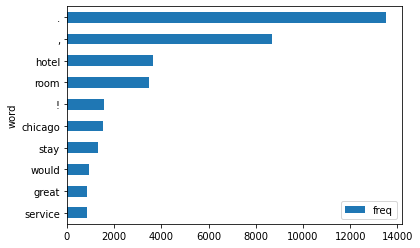

In [92]:

most_common_words.sort_values(by='freq',ascending=True).plot(x='word', kind='barh')

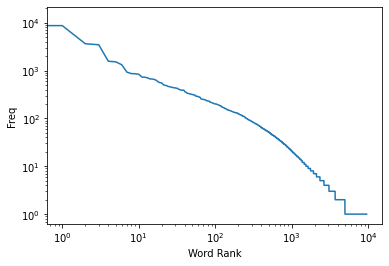

In [93]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

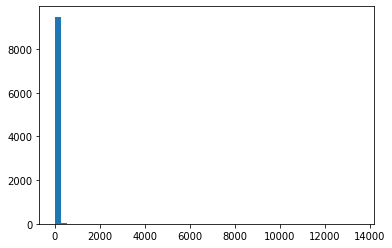

In [94]:
plt.hist(sorted_word_counts, bins=50);

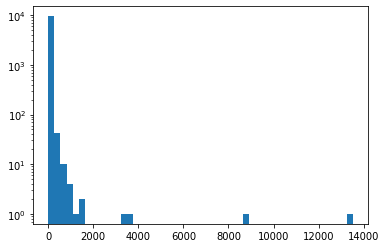

In [95]:
plt.hist(sorted_word_counts, bins=50, log=True);

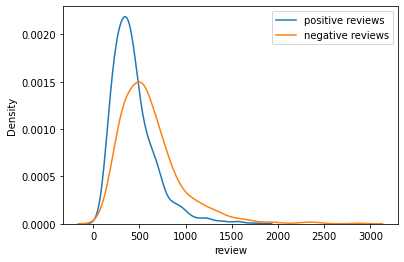

In [96]:
sns.distplot(positive_features['review'].apply(lambda y: len(y)), label='positive reviews',hist=False)
sns.distplot(negative_features['review'].apply(lambda y: len(y)), label='negative reviews',hist=False)
plt.legend()
plt.show()

In [97]:
most_common_words.word.tolist()[:3]

['.', ',', 'hotel']

In [98]:

remove = most_common_words.word.tolist()[:3]
remove

['.', ',', 'hotel']

In [99]:
negative_features['review_lemmatized'] = negative_features['review_lemmatized'].apply(lambda x: [y for y in x if y not in remove])
positive_features['review_lemmatized'] = positive_features['review_lemmatized'].apply(lambda x: [y for y in x if y not in remove])

In [100]:
positive_features['review_lemmatized_train'] = positive_features.review_lemmatized.apply(lambda x: ' '.join(x))
negative_features['review_lemmatized_train'] = negative_features.review_lemmatized.apply(lambda x: ' '.join(x))

In [101]:
x = (positive_features['review_lemmatized_train'].append(negative_features['review_lemmatized_train']))
y = (positive_features['label'].append(negative_features['label']))

In [102]:
le = preprocessing.LabelEncoder()
le.fit(y)

list(le.classes_)

['neg', 'pos']

In [103]:
y = le.transform(y)

In [104]:
print('Labels for \'{}\' are \'{}\' respectively.'.format(le.inverse_transform(np.unique(y)),np.unique(y)))

Labels for '['neg' 'pos']' are '[0 1]' respectively.


In [105]:
bow = CountVectorizer(max_features=25000, lowercase=True,analyzer = "word")
train_bow_neg = bow.fit_transform(x)
train_bow_neg

<1600x8664 sparse matrix of type '<class 'numpy.int64'>'
	with 100148 stored elements in Compressed Sparse Row format>

In [106]:
train_bow_neg.toarray().shape

(1600, 8664)

In [107]:
train_bow_neg.toarray()[1:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [108]:
vocab = bow.get_feature_names()

In [109]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_bow_neg.toarray(), axis=0)

word_freq = pd.DataFrame({'word':vocab,'freq':dist})

In [110]:
word_freq.sort_values(by='freq',ascending=False)[:10]

,word,freq
6496,room,3500
1535,chicago,1527
7296,stay,1322
8597,would,926
6768,service,869
3544,great,866
7253,staff,841
5146,night,764
5319,one,735
7297,stayed,665


In [111]:
xtrain, xtest, ytrain, ytest = train_test_split \
                (train_bow_neg.toarray(), y,test_size=0.3, \
                random_state=1000)

In [112]:
print ("No. of True Cases in training data set for" , ytrain.sum())
print ("No. of True Cases in testing data set for",ytest.sum())

print ("Ratio of True Cases in training data set: " , round(ytrain.sum()/len(ytrain),2))
print ("Ratio of True Cases in testing data set: ", round(ytest.sum()/len(ytest),2))

No. of True Cases in training data set for 562
No. of True Cases in testing data set for 238
Ratio of True Cases in training data set:  0.5
Ratio of True Cases in testing data set:  0.5


In [113]:
xtrain.shape

(1120, 8664)

In [114]:
train_bow_neg

<1600x8664 sparse matrix of type '<class 'numpy.int64'>'
	with 100148 stored elements in Compressed Sparse Row format>

In [115]:
print( "Training the multinomial Naive Bayes Classifier")

# Initialize a Random Forest classifier with 100 trees
NB = MultinomialNB() 

# This may take a few minutes to run
NB_clf = NB.fit( xtrain, ytrain )

Training the multinomial Naive Bayes Classifier


In [116]:

prob_test  = NB.predict_proba(xtest)
prob_train = NB.predict_proba(xtrain)

#Probability Threshold = 0.5 (default) 
pred_test  = NB.predict(xtest)
pred_train = NB.predict(xtrain)

In [117]:
auc_score = roc_auc_score(ytrain, prob_train[:,1])
print ("Model ROC-AUC score for training sample: %.3f" \
                                      % auc_score)
auc_score = roc_auc_score(ytest, prob_test[:,1])
print ("Model ROC-AUC score for test sample: %.3f" \
                                      % auc_score)

Model ROC-AUC score for training sample: 0.999
Model ROC-AUC score for test sample: 0.986


In [118]:
train_acc = accuracy_score(ytrain, pred_train)
test_acc  = accuracy_score(ytest, pred_test)
print ("Train Accuracy :: ", train_acc)
print ("Test Accuracy :: ", test_acc)

Train Accuracy ::  0.9830357142857142
Test Accuracy ::  0.94375



 Confusion matrix: 



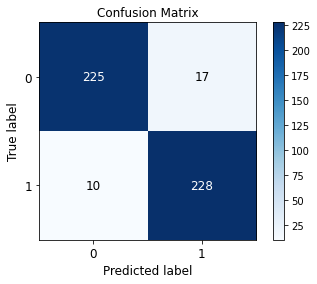

In [119]:
print ("\n Confusion matrix: \n")
skplt.metrics.plot_confusion_matrix(ytest, pred_test, title="Confusion Matrix",
                text_fontsize='large')
plt.show()

In [120]:
#Calculate classification model evaluation metrics like precision, recall, f1 score
report = classification_report(ytest, pred_test)
precision,recall,fscore,support = precision_recall_fscore_support(ytest,pred_test,average='weighted')
print("\n Classification report (weighted average across classes) ::\n", classification_report(ytest, pred_test))


 Classification report (weighted average across classes) ::
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       242
           1       0.93      0.96      0.94       238

    accuracy                           0.94       480
   macro avg       0.94      0.94      0.94       480
weighted avg       0.94      0.94      0.94       480



In [121]:

bow = CountVectorizer(max_features=25000, lowercase=True,analyzer = "word",ngram_range=(1, 2))
train_bow_neg = bow.fit_transform(x)

In [122]:
[x for x in bow.get_feature_names() if len(x.split())>1]

['00 night',
 '00 per',
 '00 pm',
 '10 00',
 '10 10',
 '10 15',
 '10 30',
 '10 charge',
 '10 day',
 '10 min',
 '10 minute',
 '10 pm',
 '10 year',
 '100 00',
 '100 night',
 '100 per',
 '100 time',
 '10th anniversary',
 '10th floor',
 '10th wedding',
 '11 30',
 '11 pm',
 '11th floor',
 '12 hour',
 '12th floor',
 '13 per',
 '13 year',
 '130 night',
 '14 dollar',
 '14th floor',
 '15 20',
 '15 am',
 '15 day',
 '15 inch',
 '15 min',
 '15 minute',
 '155 michigan',
 '15th floor',
 '16th floor',
 '17 floor',
 '170 night',
 '18th floor',
 '1st time',
 '20 dollar',
 '20 foot',
 '20 minute',
 '20 room',
 '200 night',
 '200 per',
 '200 room',
 '20th anniversary',
 '20th floor',
 '21st birthday',
 '21st century',
 '22nd floor',
 '23rd floor',
 '24 hour',
 '249 night',
 '24th floor',
 '25 00',
 '25 min',
 '250 dollar',
 '250 night',
 '250 per',
 '25th floor',
 '27 inch',
 '29th floor',
 '2nd floor',
 '2nd room',
 '2nd time',
 '2nd wedding',
 '30 40',
 '30 breakfast',
 '30 min',
 '30 minute',
 '30 nig

In [123]:
x.head()

0    recent week stay affinia definitely say coming...
1    although much overpriced opinion spotless staf...
2    affinia chicago superb room service exemplary ...
3    fantastic stayed way chicago towards arizona c...
4    affinia chicago wonderful place stay husband s...
Name: review_lemmatized_train, dtype: object

In [124]:
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(x)
txt_transformed = txt_fitted.transform(x)

In [125]:
txt_transformed.shape

(1600, 8664)

In [126]:
txt_transformed.toarray()[1:5]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 6.99146455, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [127]:
# get feature names
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['room' 'chicago' 'stay' 'staff' 'would' 'service' 'stayed' 'great'
 'night' 'one']

Features with highest idf:
['porter' 'porthole' 'eeewwhh' 'portioned' 'portrait' 'edit' 'edible'
 'posh' 'positioning' 'kicked']


In [128]:
xtrain, xtest, ytrain, ytest = train_test_split \
                (txt_transformed.toarray(), y,test_size=0.3, \
                random_state=1000)

In [129]:

print ("No. of True Cases in training data set for" , ytrain.sum())
print ("No. of True Cases in testing data set for",ytest.sum())

print ("Ratio of True Cases in training data set: " , round(ytrain.sum()/len(ytrain),2))
print ("Ratio of True Cases in testing data set: ", round(ytest.sum()/len(ytest),2))

No. of True Cases in training data set for 562
No. of True Cases in testing data set for 238
Ratio of True Cases in training data set:  0.5
Ratio of True Cases in testing data set:  0.5


In [130]:
print( "Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
forest = RandomForestClassifier(n_estimators = 1000,verbose=True) 

# Fit the forest to the training set
forest = forest.fit( xtrain, ytrain )

Training the random forest...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.6s finished


In [131]:
prob_test  = forest.predict_proba(xtest)
prob_train = forest.predict_proba(xtrain)

#Probability Threshold = 0.5 (default) 
pred_test  = forest.predict(xtest)
pred_train = forest.predict(xtrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.5s finished


In [132]:
auc_score = roc_auc_score(ytrain, prob_train[:,1])
print ("Model ROC-AUC score for training sample: %.3f" \
                                      % auc_score)
auc_score = roc_auc_score(ytest, prob_test[:,1])
print ("Model ROC-AUC score for test sample: %.3f" \
                                      % auc_score)

Model ROC-AUC score for training sample: 1.000
Model ROC-AUC score for test sample: 0.976


In [133]:
#Calculate train and test accuracy
train_acc = accuracy_score(ytrain, pred_train)
test_acc  = accuracy_score(ytest, pred_test)
print ("Train Accuracy :: ", train_acc)
print ("Test Accuracy :: ", test_acc)

Train Accuracy ::  1.0
Test Accuracy ::  0.9166666666666666


In [134]:
#Define colormap
cm = sns.light_palette("green", as_cmap=True)
var_imp_rf = pd.DataFrame({'Feature':txt_fitted.get_feature_names(),'Var Imp':forest.feature_importances_}).sort_values(by='Var Imp',ascending = False).reset_index(drop=True)
print("Top 15 - RF Feature Importance")
var_imp_rf.head(20).style.background_gradient(cmap = cm, high = 0.6, low = 0.3, axis = 0)

Top 15 - RF Feature Importance


,Feature,Var Imp
0,great,0.015774
1,rude,0.013516
2,told,0.010814
3,room,0.009412
4,wonderful,0.008958
5,comfortable,0.008251
6,finally,0.008231
7,enjoyed,0.007611
8,dirty,0.007116
9,disappointed,0.006919


In [135]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\raksh\AppData\Roaming\nltk_data...


True

In [136]:
vader = SentimentIntensityAnalyzer()

In [137]:
x.tolist()[2]

'affinia chicago superb room service exemplary food even know start chef obviously knew doing especially loved seafood personal favorite shrimp aside this loved beautiful wa definetly bargain price price would probably get good 3 star but felt $ 10,000 night 5 star europe great bang buck would recommend anybody looking relax great great amenity great city friend actually went back me loved it ! know too'

In [138]:
ss = vader.polarity_scores(x.tolist()[2])
ss

{'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'compound': 0.9955}

In [139]:
def vader_polarity(text):
    """ Transform the output to a binary 0/1 result """
    score = vader.polarity_scores(text)
    return 1 if score['pos'] > score['neg'] else 0
 
print (vader_polarity(x.tolist()[2]), y[2]) # 0 1

1 1


In [140]:
pred_y = [vader_polarity(text) for text in x.tolist()]

In [141]:
print (accuracy_score(y, pred_y))

0.665625


In [142]:
corpus_root = 'C:\\Users\\raksh\\OneDrive\\Desktop\\DAMG\\New folder'
#
# Read the list of files
#
filelists = PlaintextCorpusReader(corpus_root, '.*')
#
# List down the IDs of the files read from the local storage
#
filelists.fileids()

['Group1 (1).csv',
 'Original+review+file_team2.csv',
 'Review_file_Team5 (1).csv',
 'Reviews.csv',
 'Reviews_Dataset_Final_Team3 (1).csv',
 'hotels_review_for_s3 (1).csv',
 'reviewsteam6 (1).csv']

In [213]:
import csv
list_new=[]
for i in filelists.fileids()[1:5]:
    with open('C:\\Users\\raksh\\OneDrive\\Desktop\\DAMG\\New folder\\'+i,encoding='utf-8') as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            list_new.append(row)

In [215]:
with open('C:\\Users\\raksh\\OneDrive\\Desktop\\DAMG\\New folder\\hotels_review_for_s3 (1).csv',encoding='cp1252') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        list_new.append(row)

In [216]:
list_new

[['\ufeffAll was great'],
 ['Placed order and very quick delivery'],
 ['Was great thank you'],
 ['Great support and help through the entire process.'],
 ['Great and very quick help with refund!!!'],
 ['Always love my seasonings! Fast delivery and great taste!'],
 ['Size came back great'],
 ['Easy to find the part I needed which was delivered quickly.'],
 ['Chat Agent-was very helpful!'],
 ['Great Company and Great service'],
 ['Fast delivery & what I needed'],
 ['Hi... after my review Specsavers solved my issue.'],
 ['Fantastic service with a personal touch which was nice. Thank you!'],
 ['SMM Panel is a Social Media Marketing website. I was delighted with this and the excellent service it provides.  thank you very much for this.'],
 ["I have been using Spreaker for at least 5 years. My only complaint is that they need to not give our payments later than the date it's due."],
 ['World of Books did an oustanding job. The book arrived in fine condition.'],
 ["Terrible quality for a high 

In [228]:
list_new1=[]
for i in list_new:
    list_new1.append(str(i).replace("[","").replace("]","").replace("'","").replace('"',""))

In [229]:
list_new1

['\\ufeffAll was great',
 'Placed order and very quick delivery',
 'Was great thank you',
 'Great support and help through the entire process.',
 'Great and very quick help with refund!!!',
 'Always love my seasonings! Fast delivery and great taste!',
 'Size came back great',
 'Easy to find the part I needed which was delivered quickly.',
 'Chat Agent-was very helpful!',
 'Great Company and Great service',
 'Fast delivery & what I needed',
 'Hi... after my review Specsavers solved my issue.',
 'Fantastic service with a personal touch which was nice. Thank you!',
 'SMM Panel is a Social Media Marketing website. I was delighted with this and the excellent service it provides.  thank you very much for this.',
 'I have been using Spreaker for at least 5 years. My only complaint is that they need to not give our payments later than the date its due.',
 'World of Books did an oustanding job. The book arrived in fine condition.',
 'Terrible quality for a high priced item. Took a long time to 

In [230]:
for sentence in list_new1:
    print(sentence)
    ss = vader.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

\ufeffAll was great
compound: 0.6249, neg: 0.0, neu: 0.328, pos: 0.672, 
Placed order and very quick delivery
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Was great thank you
compound: 0.765, neg: 0.0, neu: 0.233, pos: 0.767, 
Great support and help through the entire process.
compound: 0.8591, neg: 0.0, neu: 0.345, pos: 0.655, 
Great and very quick help with refund!!!
compound: 0.8383, neg: 0.0, neu: 0.386, pos: 0.614, 
Always love my seasonings! Fast delivery and great taste!
compound: 0.8715, neg: 0.0, neu: 0.441, pos: 0.559, 
Size came back great
compound: 0.6249, neg: 0.0, neu: 0.423, pos: 0.577, 
Easy to find the part I needed which was delivered quickly.
compound: 0.4404, neg: 0.0, neu: 0.756, pos: 0.244, 
Chat Agent-was very helpful!
compound: 0.5244, neg: 0.0, neu: 0.47, pos: 0.53, 
Great Company and Great service
compound: 0.8481, neg: 0.0, neu: 0.268, pos: 0.732, 
Fast delivery & what I needed
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hi... after my review Specsavers so